### Rifaccio original step-14 dopo modifiche

   cycle  cells  DoFs  ex POINT err   est err       1/N
0      0     48    72      0.001017  0.000702  0.013889
1      1     45    67      0.000965  0.000889  0.014925
2      2     96   130      0.000485  0.000455  0.007692
3      3    243   307      0.000254  0.000241  0.003257
4      4    618   718      0.000080  0.000075  0.001393
5      5   1485  1665      0.000039  0.000037  0.000601
6      6   3573  3975      0.000016  0.000015  0.000252
7      7   8388  8934      0.000007  0.000006  0.000112


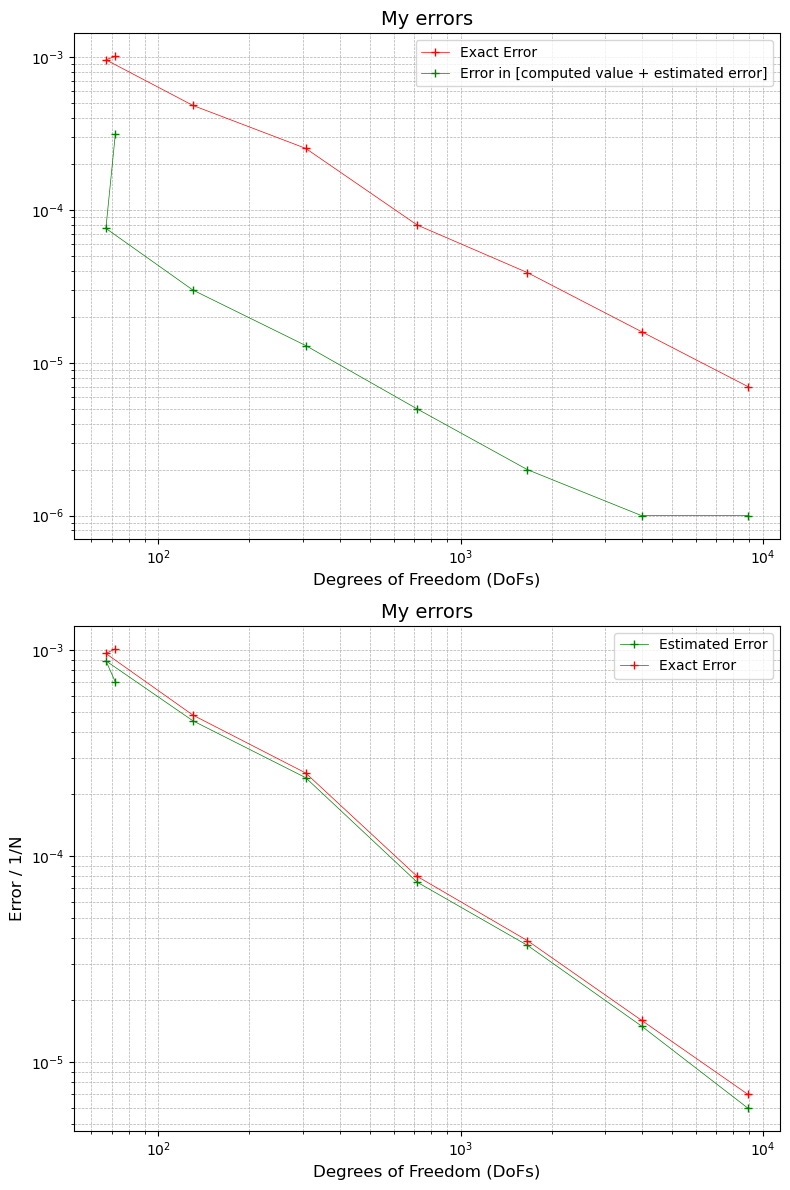

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "../results/convergence_results.csv"
EXACT_VALUE = 0.0334473
#EXACT_VALUE = 1.767446e-05    # Ratio 1:100
#EXACT_VALUE = 1.742630e-05     # Ratio 1:99
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
data['1/N'] = 1 / data['DoFs']
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
#plt.loglog(data['DoFs'], abs((data['computed_value']+data["est err"])-EXACT_VALUE),"y-+", linewidth=0.5, label='(real) Error in [computed value + estimated error]')
#plt.loglog(data['DoFs'], data['1/N']*0.03, "b:", linewidth=0.5, label='1/N')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Plot 2: Duplicate plot
plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=0.5, label='Estimated Error')
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=0.5, label='Exact Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error / 1/N', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
